<a href="https://colab.research.google.com/github/Husain-Vora/Deep-Learning-and-AI/blob/main/Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***tf.data***

In [1]:
import tensorflow as tf

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
type(data)

sklearn.utils._bunch.Bunch

In [5]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
data.data.shape

(569, 30)

In [7]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

N, D = x_train.shape

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
#create tensorflow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [11]:
train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(30,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [12]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_shape=(D, ), activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Complile model
model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy'],
)

In [14]:
# Train model
batch_size = 32

# Old way
#r = model.fit(
#    x_train, y_train,
#    validation_data = (x_test, y_test),
#    epochs = 15,
#)

# New way
r = model.fit(
    train_dataset.batch(batch_size),
    validation_data = test_dataset.batch(batch_size),
    epochs = 15,
)

Epoch 1/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5082 - loss: 0.6851 - val_accuracy: 0.9043 - val_loss: 0.4247
Epoch 2/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8908 - loss: 0.4058 - val_accuracy: 0.9521 - val_loss: 0.2723
Epoch 3/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9160 - loss: 0.2825 - val_accuracy: 0.9628 - val_loss: 0.2024
Epoch 4/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9260 - loss: 0.2215 - val_accuracy: 0.9734 - val_loss: 0.1646
Epoch 5/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9292 - loss: 0.1863 - val_accuracy: 0.9734 - val_loss: 0.1409
Epoch 6/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9446 - loss: 0.1630 - val_accuracy: 0.9734 - val_loss: 0.1246
Epoch 7/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9528 - loss: 0.1459 - val_accuracy: 0.9734 - val_loss: 0.1124
Epoch 8/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9674 - loss: 0.1325 - val_accuracy: 0.9734 - va

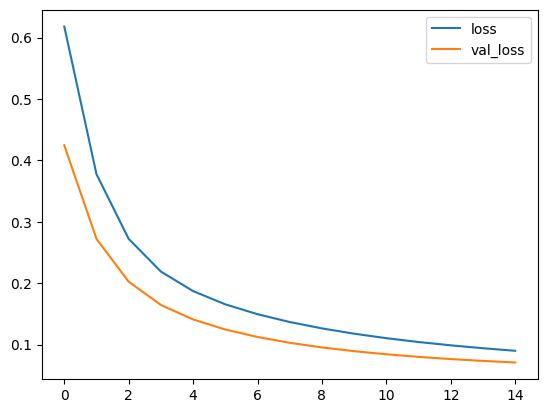

In [15]:
# Plot loss per iteration
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label = 'loss');
plt.plot(r.history['val_loss'], label = 'val_loss');
plt.legend();
plt.show();

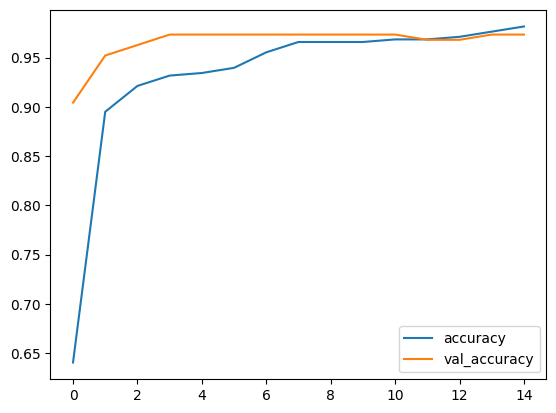

In [16]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label = 'accuracy');
plt.plot(r.history['val_accuracy'], label = 'val_accuracy');
plt.legend();
plt.show();

In [17]:
#Evaluate the model
print(model.evaluate(test_dataset.batch(batch_size)))
# [loss, accuracy]

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9836 - loss: 0.0720
[0.07086387276649475, 0.9734042286872864]


In [19]:
# Example usage of batch method
dataset = tf.data.Dataset.from_tensor_slices([
    1, 2, 3, 4, 5, 6, 7, 8, 9, 10
])

# Batch elements into batches of size 3
Batched_dataset = dataset.batch(3)

# iterate over batches
for batch in Batched_dataset:
  print(batch.numpy())

[1 2 3]
[4 5 6]
[7 8 9]
[10]


In [21]:
# Example 2
shuffled = dataset.shuffle(buffer_size=3)

batched_shuffle = shuffled.batch(3)
for batch in batched_shuffle:
  print(batch.numpy())

[2 3 1]
[4 5 6]
[ 8 10  9]
[7]


In [23]:
# Example 3
transformed = dataset.map(lambda x: x / 2)
batched_transformed = transformed.batch(3)

for batch in batched_transformed:
  print(batch.numpy())

[0.5 1.  1.5]
[2.  2.5 3. ]
[3.5 4.  4.5]
[5.]
